In [1204]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [1205]:
# Correct URLs for the raw CSV files
df_url = 'https://raw.githubusercontent.com/mredshaw/AI_BUS/main/house_prices_train.csv'
df_test_url = 'https://raw.githubusercontent.com/mredshaw/AI_BUS/main/house_prices_test.csv'

# Reading the CSV files
df_train = pd.read_csv(df_url, delimiter=',')
df_test = pd.read_csv(df_test_url, delimiter=',')

In [1206]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1207]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1208]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1209]:
df_train['TotalBsmtSF'].value_counts()

TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: count, Length: 721, dtype: int64

In [1210]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [1211]:
def fill_na(df):
    df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['GarageCond'] = df['GarageCond'].fillna('None')
    df['GarageType'] = df['GarageType'].fillna('None')
    df['GarageFinish'] = df['GarageFinish'].fillna('None')
    df['GarageQual'] = df['GarageQual'].fillna('None')
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
    df['BsmtCond'] = df['BsmtCond'].fillna('None')
    df['BsmtQual'] = df['BsmtQual'].fillna('None')
    df['LotFrontage'] = df['LotFrontage'].fillna(0)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['Alley'] = df['Alley'].fillna('None')
    df['PoolQC'] = df['PoolQC'].fillna('None')
    df['MiscFeature'] = df['MiscFeature'].fillna('None')
    df['Fence'] = df['Fence'].fillna('None')
    df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'] == 0), 'MasVnrType'] = 'None'
    df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'] > 0), 'MasVnrType'] = df['MasVnrType'].mode()[0]


In [1212]:
fill_na(df_train)
fill_na(df_test)

In [1213]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1214]:
df_test = df_test.dropna()


In [1215]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1447 non-null   int64  
 1   MSSubClass     1447 non-null   int64  
 2   MSZoning       1447 non-null   object 
 3   LotFrontage    1447 non-null   float64
 4   LotArea        1447 non-null   int64  
 5   Street         1447 non-null   object 
 6   Alley          1447 non-null   object 
 7   LotShape       1447 non-null   object 
 8   LandContour    1447 non-null   object 
 9   Utilities      1447 non-null   object 
 10  LotConfig      1447 non-null   object 
 11  LandSlope      1447 non-null   object 
 12  Neighborhood   1447 non-null   object 
 13  Condition1     1447 non-null   object 
 14  Condition2     1447 non-null   object 
 15  BldgType       1447 non-null   object 
 16  HouseStyle     1447 non-null   object 
 17  OverallQual    1447 non-null   int64  
 18  OverallCond  

In [1216]:
df_test.drop('Id', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)

In [1217]:
def convert_object_columns_to_labels(df):
    object_columns = df.select_dtypes(include='object').columns  # Get the object type columns
    
    for column in object_columns:
        df[column] = LabelEncoder().fit_transform(df[column])

In [1218]:
df_train.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,...,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,3,4,4,2,5,...,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,None,Reg,Lvl,AllPub,Inside,...,NaN,None,None,None,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,1052,...,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,57.623288,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,34.664304,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,42.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,63.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [1219]:
numerical_columns = df_train.select_dtypes(include='number').columns
correlation_matrix = df_train[numerical_columns].corr()
sorted_corr_matrix = correlation_matrix['SalePrice'].sort_values(ascending=False, key=abs)
print(sorted_corr_matrix)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass      -0.084284
OverallCond     -0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64


In [1220]:
X = pd.get_dummies(df_train.drop(['SalePrice'], axis=1))
y = df_train['SalePrice']

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = rf.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

for index in sorted_indices:
    feature = X.columns[index]
    importance = feature_importances[index]
    print(f'{feature}: {importance}')

GrLivArea: 0.027422274527839144
BsmtUnfSF: 0.02665086775420593
LotArea: 0.026452709284451884
TotalBsmtSF: 0.026225774290877146
1stFlrSF: 0.026215748562493327
GarageArea: 0.02524230951694177
MoSold: 0.02299592246598532
YearBuilt: 0.022660237399619542
LotFrontage: 0.02249094779673968
GarageYrBlt: 0.022121740271073456
YearRemodAdd: 0.021780853258246656
BsmtFinSF1: 0.021603208320128547
OpenPorchSF: 0.01947650105454158
WoodDeckSF: 0.0180409959073457
YrSold: 0.017685717054162664
TotRmsAbvGrd: 0.01665459172923802
MasVnrArea: 0.016647903675052967
2ndFlrSF: 0.014878401036091742
OverallQual: 0.014247810360988166
OverallCond: 0.011195736607318598
BedroomAbvGr: 0.011164699300927566
MSSubClass: 0.010396909133025623
Fireplaces: 0.007918869684442987
BsmtFullBath: 0.00774212341296738
GarageCars: 0.00743063770461849
LotShape_IR1: 0.007263310166461241
LotConfig_Inside: 0.007055548710101831
EnclosedPorch: 0.006700389347214919
BsmtFinSF2: 0.006643271758126445
MasVnrType_BrkFace: 0.006467037747923871
HalfB

In [1221]:
cat_columns = []
num_columns = []

for column in df_train.columns:
    if column != 'SalePrice':
        if df_train[column].dtype == 'object':  # Categorical columns
            cat_columns.append(column)
        else:  # Numerical columns
            num_columns.append(column)

target = 'SalePrice'


In [1222]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train[cat_columns + num_columns], df_train[target], test_size=0.3, random_state=42)
X_test = df_test[cat_columns + num_columns]

In [1223]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_columns), ('num', num_transformer, num_columns)])

In [1224]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_valid_transformed = preprocessor.transform(X_valid)
X_test_transformed = preprocessor.transform(X_test)

In [1225]:
from sklearn.linear_model import LinearRegression

# Create the LinearRegression model
ols = LinearRegression()

# Fit the model on the training data
ols.fit(X_train_transformed, y_train)

# Make predictions on the validation set
ols_valid_pred = ols.predict(X_valid_transformed)

# Evaluate the model on the validation set
ols_valid_r2 = r2_score(y_valid, ols_valid_pred)
ols_valid_mse = mean_squared_error(y_valid, ols_valid_pred)

print("OLS Model")
print(f"Validation R^2: {ols_valid_r2}")
print(f"Validation MSE: {ols_valid_mse}")


OLS Model
Validation R^2: 0.11520323681421563
Validation MSE: 6174194772.886014


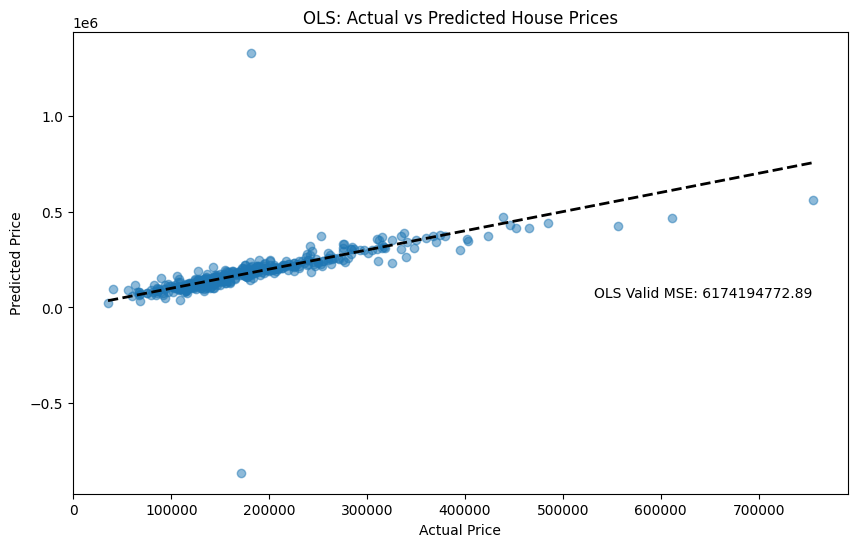

In [1226]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, ols_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('OLS: Actual vs Predicted House Prices')
plt.text(y_valid.max(), y_valid.min(), f'OLS Valid MSE: {ols_valid_mse:.2f}', ha='right', va='bottom')

plt.show()

In [1227]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [1228]:
# Define the parameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]  # Define the range of alpha values to search
}

# Create the Lasso model
lasso = Lasso(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
lasso_valid_pred = best_model.predict(X_valid_transformed)

lasso_valid_r2 = r2_score(y_valid, lasso_valid_pred)
lasso_valid_mse = mean_squared_error(y_valid, lasso_valid_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Validation R^2 with best model: {lasso_valid_r2}")
print(f"Validation MSE with best model: {lasso_valid_mse}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108022788400.28084, tolerance: 483985512.6952248
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107923125793.8214, tolerance: 483985512.6952248
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152868916358.64767, tolerance: 506324727.1564299
  model = cd_fast.sparse_

Best Hyperparameters: {'alpha': 10.0}
Validation R^2 with best model: 0.900336125504354
Validation MSE with best model: 695463860.8091052


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2582006568.162903, tolerance: 615098412.8205528
  model = cd_fast.sparse_enet_coordinate_descent(


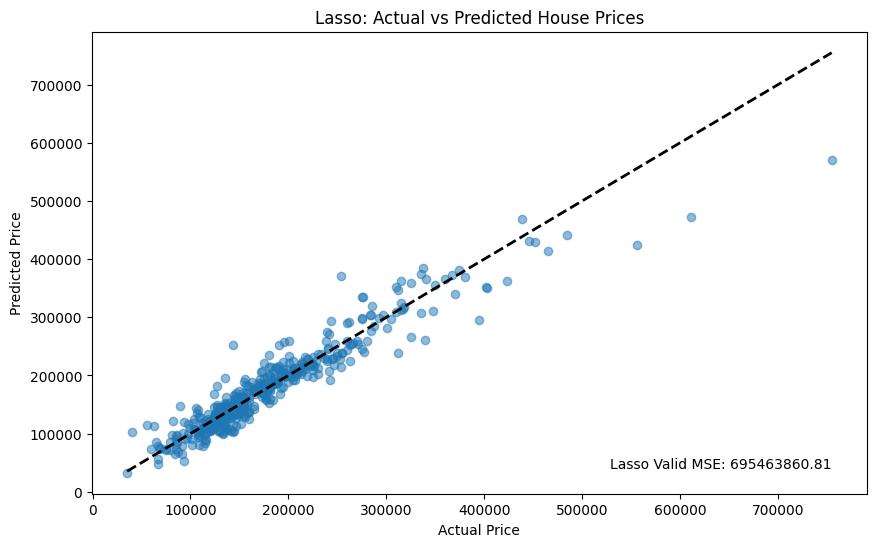

In [1229]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, lasso_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso: Actual vs Predicted House Prices')
plt.text(y_valid.max(), y_valid.min(), f'Lasso Valid MSE: {lasso_valid_mse:.2f}', ha='right', va='bottom')

plt.show()




In [1230]:
from sklearn.linear_model import Ridge

# Define the parameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]  # Define the range of alpha values to search
}

# Create the Ridge model
ridge = Ridge(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
ridge_valid_pred = best_model.predict(X_valid_transformed)

ridge_valid_r2 = r2_score(y_valid, ridge_valid_pred)
ridge_valid_mse = mean_squared_error(y_valid, ridge_valid_pred)

print("Ridge Model")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation R^2 with best model: {ridge_valid_r2}")
print(f"Validation MSE with best model: {ridge_valid_mse}")


Ridge Model
Best Hyperparameters: {'alpha': 0.001}
Validation R^2 with best model: 0.6029844834625222
Validation MSE with best model: 2770411498.9462695


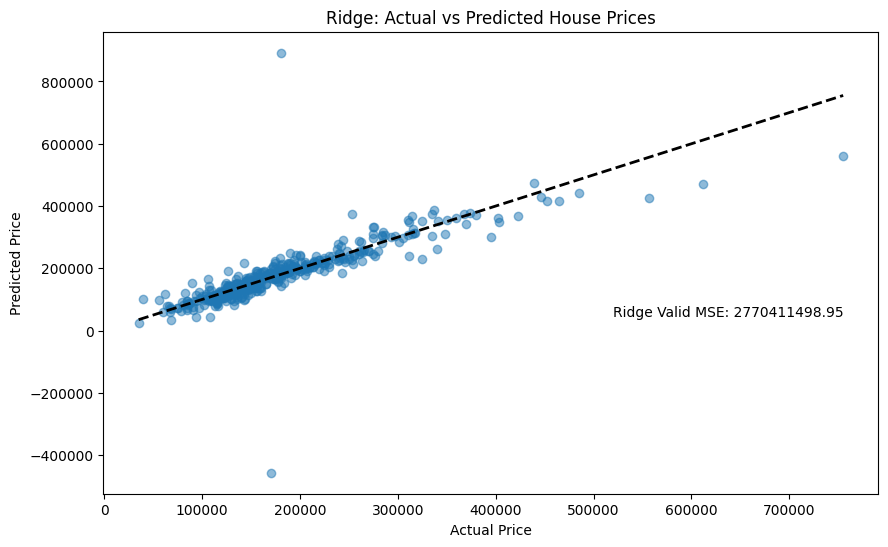

In [1231]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, ridge_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge: Actual vs Predicted House Prices')
plt.text(y_valid.max(), y_valid.min(), f'Ridge Valid MSE: {ridge_valid_mse:.2f}', ha='right', va='bottom')

plt.show()

In [1232]:
from sklearn.linear_model import ElasticNet

# Define the parameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # Define the range of alpha values to search
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Define the range of l1_ratio values to search
}

# Create the ElasticNet model
elastic_net = ElasticNet(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
elastic_net_valid_pred = best_model.predict(X_valid_transformed)

elastic_net_valid_r2 = r2_score(y_valid, elastic_net_valid_pred)
elastic_net_valid_mse = mean_squared_error(y_valid, elastic_net_valid_pred)

print("ElasticNet Model")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation R^2 with best model: {elastic_net_valid_r2}")
print(f"Validation MSE with best model: {elastic_net_valid_mse}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125636719937.78603, tolerance: 483985512.6952248
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200305421392.37204, tolerance: 474197795.0469258
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209830688984.59265, tolerance: 511306008.19122326
  model = cd_fast.spars

ElasticNet Model
Best Hyperparameters: {'alpha': 1.0, 'l1_ratio': 0.7}
Validation R^2 with best model: 0.8507925427757844
Validation MSE with best model: 1041183626.341917


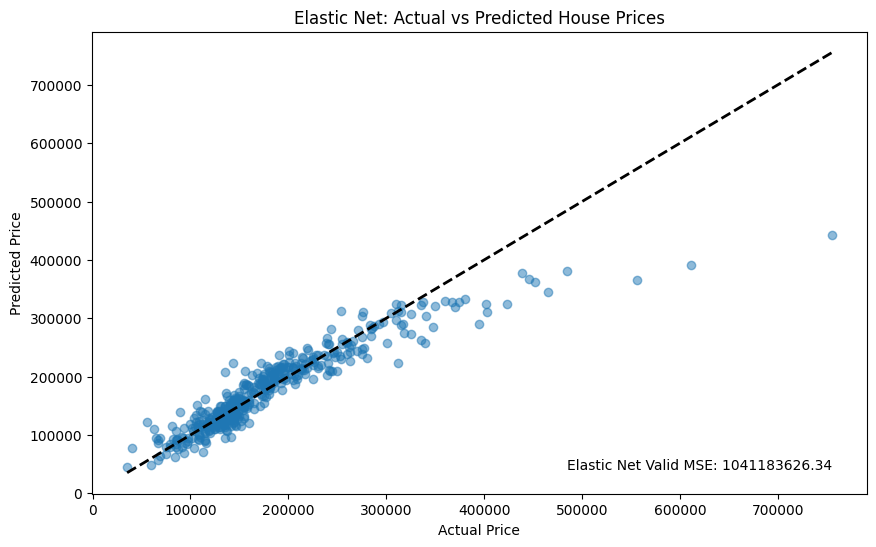

In [1233]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, elastic_net_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Elastic Net: Actual vs Predicted House Prices')
plt.text(y_valid.max(), y_valid.min(), f'Elastic Net Valid MSE: {elastic_net_valid_mse:.2f}', ha='right', va='bottom')

plt.show()

In [1234]:
from sklearn.linear_model import SGDRegressor
# Define the parameter grid to search over
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Define the range of alpha values to search
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']  # Define the correct loss functions
}

# Create the SGDRegressor model with scaling
sgd = SGDRegressor(max_iter=20000, random_state=42)  # Increase max_iter for more iterations

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
sgd_valid_pred = best_model.predict(X_valid_transformed)

sgd_valid_r2 = r2_score(y_valid, sgd_valid_pred)
sgd_valid_mse = mean_squared_error(y_valid, sgd_valid_pred)

print("SGD Model")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation R^2 with best model: {sgd_valid_r2}")
print(f"Validation MSE with best model: {sgd_valid_mse}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration re

SGD Model
Best Hyperparameters: {'alpha': 0.01, 'loss': 'squared_epsilon_insensitive'}
Validation R^2 with best model: 0.863341057106714
Validation MSE with best model: 953618916.7801995


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration re

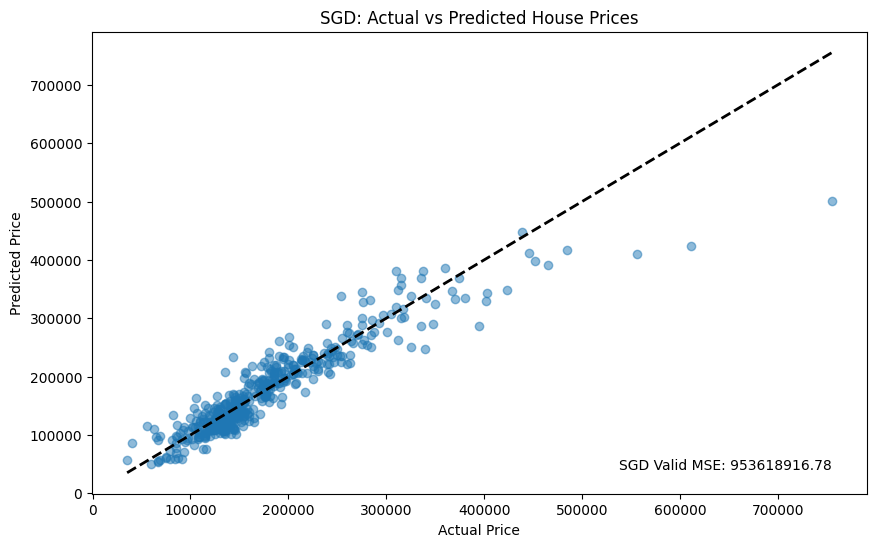

In [1235]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, sgd_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('SGD: Actual vs Predicted House Prices')
plt.text(y_valid.max(), y_valid.min(), f'SGD Valid MSE: {sgd_valid_mse:.2f}', ha='right', va='bottom')

plt.show()

In [1236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid to search over
param_dist = {
    'n_estimators': randint(10, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Random Forest Regressor model
rf = RandomForestRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the validation set
rf_valid_pred = best_model.predict(X_valid_transformed)

rf_valid_r2 = r2_score(y_valid, rf_valid_pred)
rf_valid_mse = mean_squared_error(y_valid, rf_valid_pred)

print("Random Forest Model")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation R^2 with best model: {rf_valid_r2}")
print(f"Validation MSE with best model: {rf_valid_mse}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=81; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=81; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=81; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=81; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=81; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=318; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=318; 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11

Random Forest Model
Best Hyperparameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}
Validation R^2 with best model: 0.879062152172122
Validation MSE with best model: 843915641.3891429


Text(755000, 35311, 'Random Forest Valid MSE: 843915641.39')

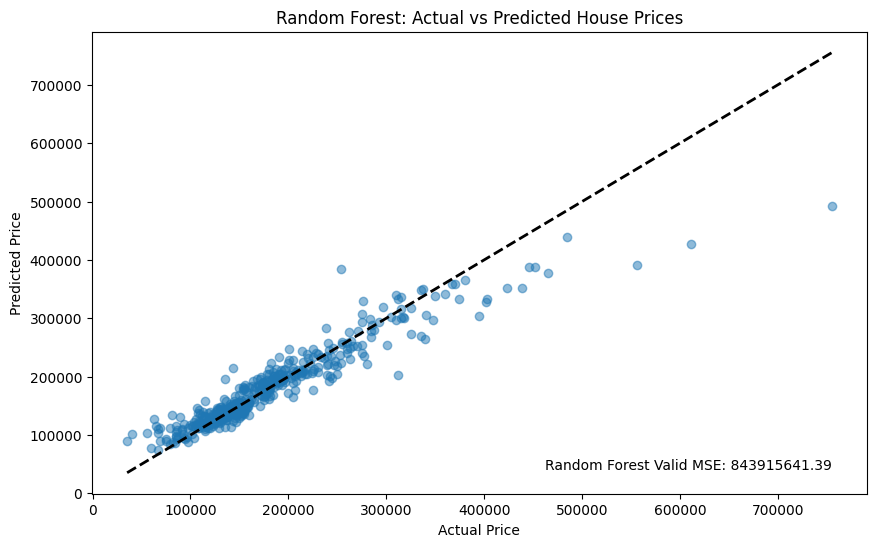

In [1237]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, rf_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted House Prices')
plt.text(y_valid.max(), y_valid.min(), f'Random Forest Valid MSE: {rf_valid_mse:.2f}', ha='right', va='bottom')


In [1238]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define the parameter grid to search over
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

# Create the SVR model
svr = SVR()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, n_iter=100,
                                    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the validation set
svr_valid_pred = best_model.predict(X_valid_transformed)

svr_valid_r2 = r2_score(y_valid, svr_valid_pred)
svr_valid_mse = mean_squared_error(y_valid, svr_valid_pred)

print("SVR Model")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation R^2 with best model: {svr_valid_r2}")
print(f"Validation MSE with best model: {svr_valid_mse}")


SVR Model
Best Hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.1, 'C': 1000}
Validation R^2 with best model: 0.8937463291467429
Validation MSE with best model: 741448077.6580123


Text(755000, 35311, 'SVM Valid MSE: 741448077.66')

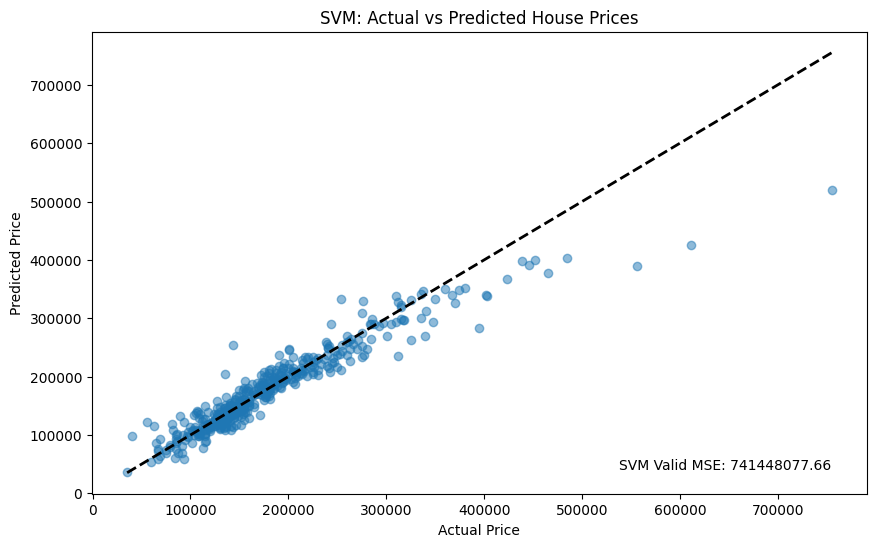

In [1239]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, svr_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('SVM: Actual vs Predicted House Prices')
plt.text(y_valid.max(), y_valid.min(), f'SVM Valid MSE: {svr_valid_mse:.2f}', ha='right', va='bottom')


In [1240]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'gamma': [0, 0.1, 0.3, 0.5, 1],
    'subsample': [0.5, 0.7, 0.9, 1],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Create the XGBRegressor model
xgb = XGBRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100,
                                    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the validation set
xgb_valid_pred = best_model.predict(X_valid_transformed)

xgb_valid_r2 = r2_score(y_valid, xgb_valid_pred)
xgb_valid_mse = mean_squared_error(y_valid, xgb_valid_pred)

print("XGBoost Model")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation R^2 with best model: {xgb_valid_r2}")
print(f"Validation MSE with best model: {xgb_valid_mse}")


XGBoost Model
Best Hyperparameters: {'subsample': 1, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.7}
Validation R^2 with best model: 0.9151150188160159
Validation MSE with best model: 592335357.5974103


Text(755000, 35311, 'XGBoost Valid MSE: 592335357.60')

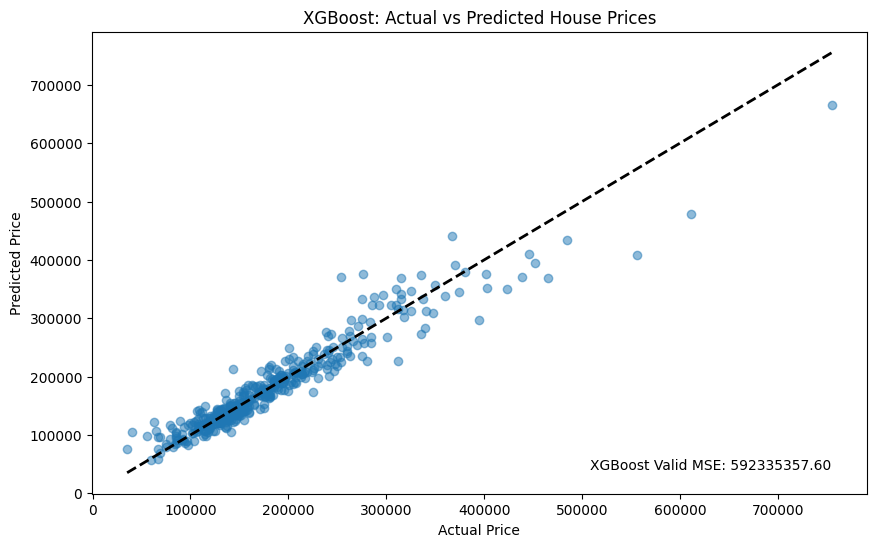

In [1241]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, xgb_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Actual vs Predicted House Prices')
plt.text(y_valid.max(), y_valid.min(), f'XGBoost Valid MSE: {xgb_valid_mse:.2f}', ha='right', va='bottom')


In [1242]:
import pandas as pd
import numpy as np


# Store the results in a dictionary
results = {
    'Model': ['OLS', 'Lasso', 'Ridge', 'Elastic Net', 'SGD', 'Random Forest', 'SVR', 'XGBoost'],
    'R^2': [ols_valid_r2, lasso_valid_r2, ridge_valid_r2, elastic_net_valid_r2, sgd_valid_r2, rf_valid_r2, svr_valid_r2, xgb_valid_r2],
    'MSE': [ols_valid_mse, lasso_valid_mse, ridge_valid_mse, elastic_net_valid_mse, sgd_valid_mse, rf_valid_mse, svr_valid_mse, xgb_valid_mse]
}


# Calculate RMSE
results['RMSE'] = [np.sqrt(mse) for mse in results['MSE']]
# Create a pandas DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


           Model       R^2           MSE          RMSE
0            OLS  0.115203  6.174195e+09  78576.044523
1          Lasso  0.900336  6.954639e+08  26371.648807
2          Ridge  0.602984  2.770411e+09  52634.698621
3    Elastic Net  0.850793  1.041184e+09  32267.377122
4            SGD  0.863341  9.536189e+08  30880.720794
5  Random Forest  0.879062  8.439156e+08  29050.226185
6            SVR  0.893746  7.414481e+08  27229.544206
7        XGBoost  0.915115  5.923354e+08  24337.940702
